Implement a SIFT-based matching pipeline: (a) detect SIFT keypoints and descriptors in two images; (b) scale or rotate one image and revaluate features; (c) match descriptors using nearest-neighbour + ratio test; (d) evaluate the robustness of keypoints under transformations.

In [35]:
import cv2
import matplotlib.pyplot as plt

In [36]:
img1 = cv2.imread('images/Front_view_of_Statue_of_Liberty_with_pedestal_and_base.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/Statue_of_Liberty_frontal.jpg', cv2.IMREAD_GRAYSCALE)

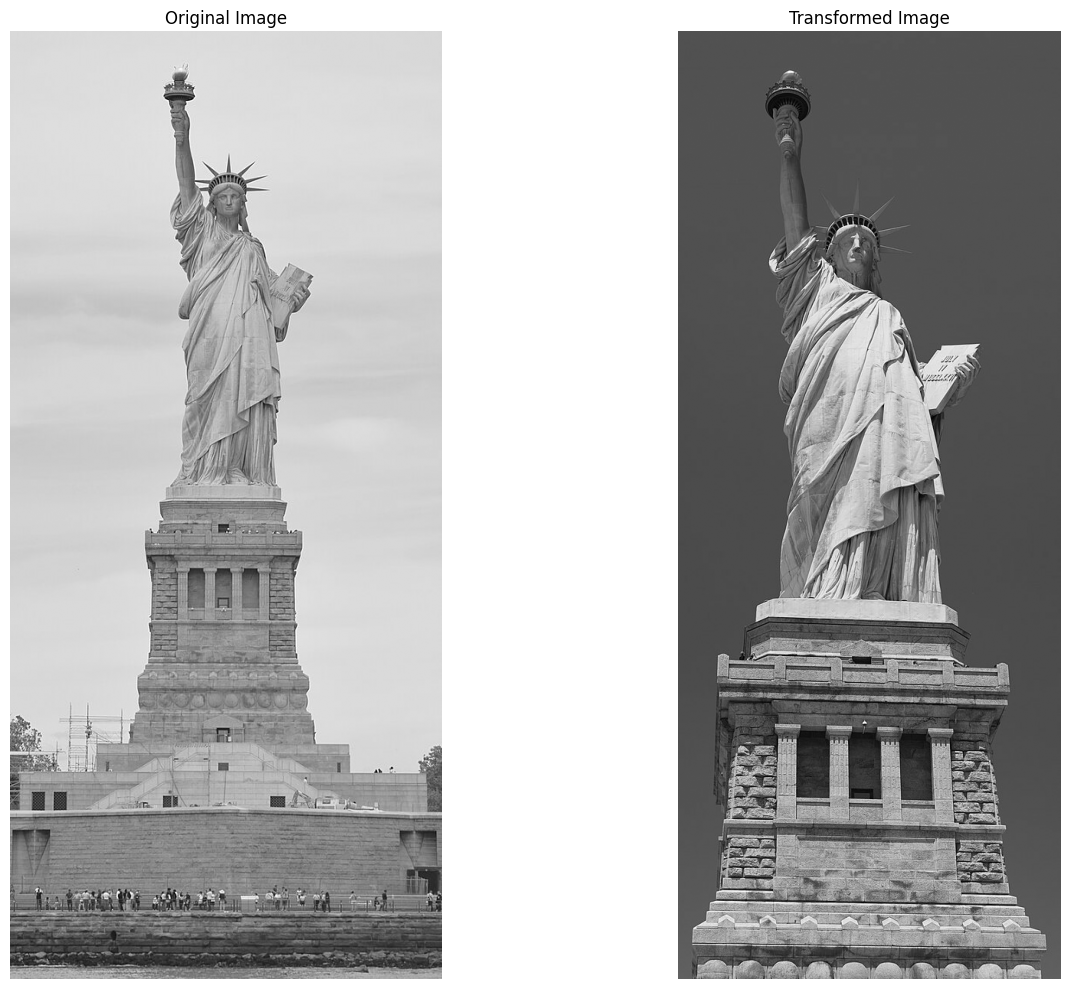

In [37]:
plt.figure(figsize=(15, 10)) 
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout() 
plt.show()

In [38]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [39]:
img_kp1 = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp2 = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

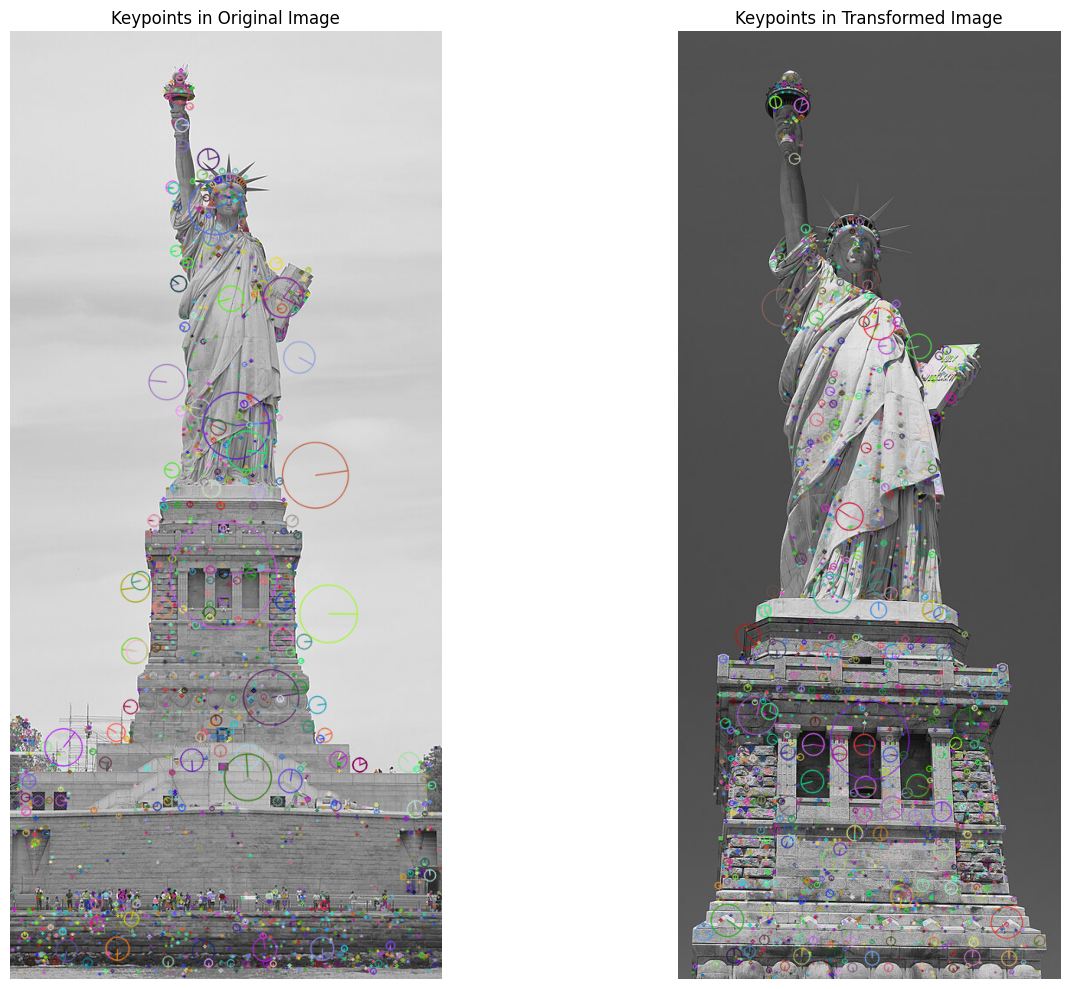

In [40]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_kp1, cmap='gray')
plt.title('Keypoints in Original Image')    
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_kp2, cmap='gray')
plt.title('Keypoints in Transformed Image')
plt.axis('off')
plt.tight_layout()
plt.show()

Match Descriptors Using Nearest Neighbour + Ratio Test

In [41]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

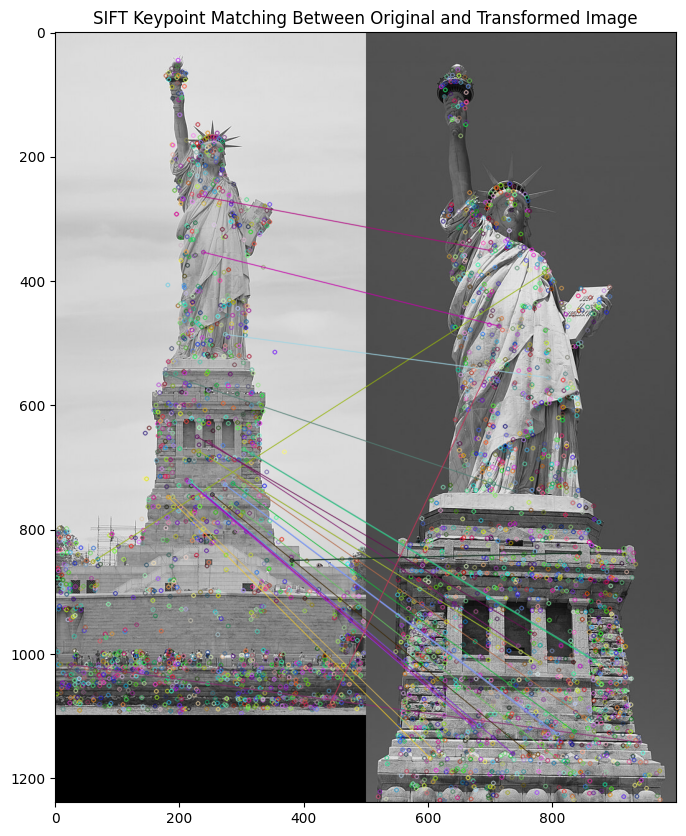

In [42]:
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.figure(figsize=(20,10))
plt.imshow(matched_img)
plt.title("SIFT Keypoint Matching Between Original and Transformed Image")
plt.show()

In [43]:
robustness = (len(good_matches) / len(kp1))
print(f"Robustness of keypoint matching: {robustness}")

Robustness of keypoint matching: 0.016867469879518072


 Robustness (%) = (Number of Good Matches / Number of Keypoints in Original Image) × 100

In [44]:
robustness = (len(good_matches) / len(kp1)) * 100
print(f"Robustness of keypoint matching: {robustness:.2f}%")

Robustness of keypoint matching: 1.69%
